In [220]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [221]:
#aggregate_daily_trips_per_day_df = pd.read_excel('Aggregate FHV Data.xlsx', index_col='Date')
aggregate_daily_trips_per_day_df = pd.read_excel('Aggregate FHV Data.xlsx')
aggregate_daily_trips_per_day_df['Date'] = pd.to_datetime(aggregate_daily_trips_per_day_df['Date'])
aggregate_daily_trips_per_day_df.head()

,Date,American,Carmel,Dial 7,Diplo,Firstclass,Highclass,Prestige,Skyline,Lyft,Uber,Yellow Taxis,Green Taxis
0,2014-07-01,921,2871,2233,1046,1744,1368,3345,1668,0,21228,440655,38167
1,2014-07-02,1028,2965,2409,1275,2228,1661,3533,1691,0,26480,434416,42472
2,2014-07-03,1068,3361,2520,1200,2121,1599,3649,1157,0,21597,412980,46046
3,2014-07-04,1008,2174,1955,1171,1459,1622,3401,337,0,14148,306773,41535
4,2014-07-05,1214,1846,1371,1371,1703,1898,4081,276,0,10890,305653,46873


In [222]:
#type(aggregate_daily_trips_per_day_df['American'])

In [223]:

fig = plt.figure(figsize=(200, 100))
ax = fig.add_subplot(111)
ax.plot_date(x=aggregate_daily_trips_per_day_df['Date'], y=aggregate_daily_trips_per_day_df['American'], fmt="r-")
plt.show()
#timeseries plot of 'American' rides for entire period

In [224]:
df_sum = aggregate_daily_trips_per_day_df.sum(1)
#fig = plt.figure(figsize=(200, 100))
#ax = fig.add_subplot(111)
ax.plot_date(aggregate_daily_trips_per_day_df['Date'], df_sum, fmt="r-",
            )
plt.show()
#timeseries plot of total rides per day

In [245]:
#sum number of rides per day
aggregate_daily_trips_per_day_df['weekday'] = aggregate_daily_trips_per_day_df['Date'].apply(lambda x: x.weekday())
weekday = aggregate_daily_trips_per_day_df.groupby('weekday')
sum_of_all_trip_per_company = weekday.sum()
#print(sum_of_all_trip_per_company)

In [246]:
taxi_providers = ['American','Carmel','Dial 7','Diplo','Firstclass','Green Taxis','Highclass','Prestige','Skyline','Lyft','Uber','Yellow Taxis']
sum_of_all_trip_per_company["Total rides"] = sum_of_all_trip_per_company[taxi_providers].sum(1)
sum_of_all_trip_per_day = sum_of_all_trip_per_company["Total rides"].to_frame("Total rides")
sum_of_all_trip_per_company = sum_of_all_trip_per_company.drop("Total rides", axis =1)

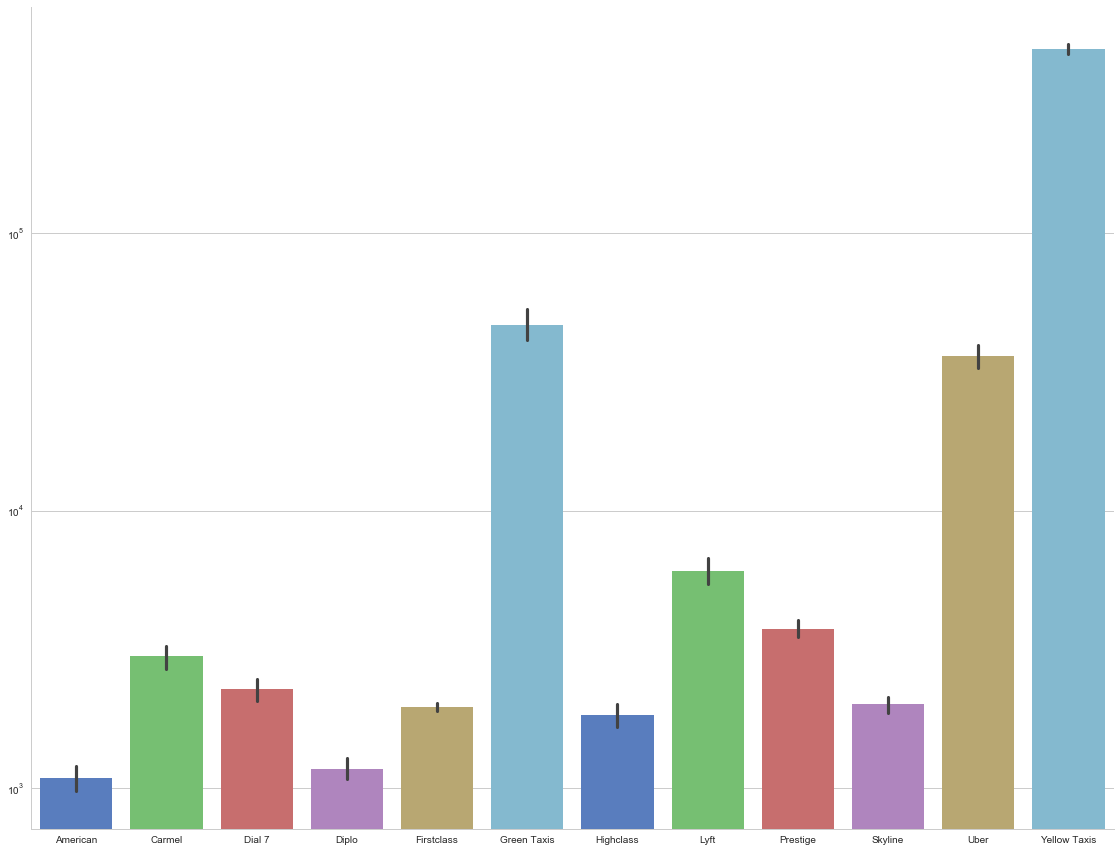

In [247]:
percentile = weekday.quantile([.95])
sns.set(style="whitegrid")
percentile_plot = sns.factorplot(data = percentile, kind="bar",size=12, aspect=1.33, palette="muted")
percentile_plot.fig.get_axes()[0].set_yscale('log')
plt.show()

In [248]:
#weekday.apply(lambda g: print(g.head()))
def checkQuantile(series, quantile):
    return series[series <= int(quantile)].sum()

sum_trips = sum_of_all_trip_per_company.copy()
for name,group in weekday:
    #print(i)
    #print(j.quantile([.95]))
    #print(j.American.apply(lambda x: x <= j['American'].quantile([.95])))
    for column in taxi_providers:
        q = group[column].quantile([.99])
        #print(q)
        sum_trips[column][name] = checkQuantile(group[column], q)
        #print(j[i])
sum_of_all_trip_per_day["Without outliers"] = sum_trips[taxi_providers].sum(1)

In [274]:
sum_of_all_trip_per_day.unstack()

                  weekday
Total rides       0          5980398
                  1          7055283
                  2          6801240
                  3          6973981
                  4          7014051
                  5          7016887
                  6          6232563
Without outliers  0          5464346
                  1          6511939
                  2          6237879
                  3          6390084
                  4          6402963
                  5          6374178
                  6          5679783
dtype: int64

In [249]:
#sum_of_all_trip_per_day = sum_of_all_trip_per_day.reset_index()

In [250]:
#sum_of_all_trip_per_day = sum_of_all_trip_per_day.drop(['level_0'], axis=1)

In [275]:
# trips = pd.DataFrame({'weekday' : sum_of_all_trip_per_day
#                       ,"type": sum_of_all_trip_per_day.columns
#                       "sum": sum_of_all_trip_per_day.columns
#                      })

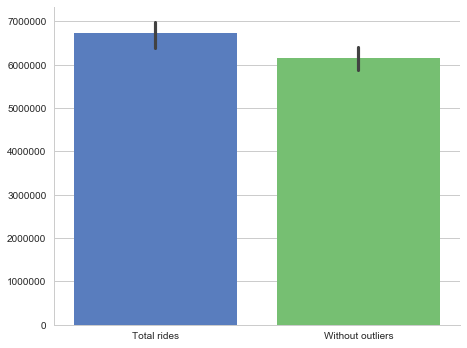

In [277]:
total_trips_plot = sns.factorplot(data = sum_of_all_trip_per_day, kind="bar",size=5, aspect=1.33, palette="muted")
#total_trips_plot.fig.get_axes()[0].set_yscale('log')
plt.show()

In [267]:
titanic = sns.load_dataset("titanic")

In [268]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
